# DSCI 100 Group 37: Final Project

Raymond Lan, Varun Raval, Tianna Wong, Brendon Yih

# Predicting Experience Level Using Age and Hours Played

## Introduction

In this project, we will be working with local game data collected from a virtual world called PLAIcraft, which is run by a Computer Science research group at UBC, led by Frank Wood. PLAIcraft’s primary goal is “to create an advanced artificial intelligence (AI) that can act in a human-like way in a simulated setting” (PLAI, 2025). The data consists of two files: `players.csv` and `sessions.csv`; however, the aim of our analysis only requires the use of `players.csv`. This project aims to confer analysis and modelling of the data, as well as visualizing it graphically to predict any correlations between the variables used. The researchers want to determine what kind of players contribute a significant amount of data so they can target these players during their recruiting efforts. To explore this research goal, we will investigate whether age and playing hours can be used to predict the experience level of a player. The relationship between the variables (experience level, age, and playing hours) will help identify highly engaged players who are more likely to contribute the most data. The analysis of highly engaged players can help the researchers understand player behaviour, which will be used to “train and develop an advanced AI” (PLAI, 2025) that can interact in PLAIcraft more naturally. 


### Dataset Description 

The player dataset includes unique data for each individual player. There are 196 observations, which indicate the number of players in the dataset and 7 variables that highlight each players' characteristics and in game behaviour. 


|Variable        |Type       |Description of Variable                       |
|:---------------|:----------|:---------------------------------------------|
|experience      |Character  |Experience level of a player                  |
|subscribe       |Character  |If the player is subscribed to the news letter|
|hashedEmail     |Character  |Player's unique hashed email                  |
|played_hours    |Double     |Number of hours played                        |
|name            |Character  |Name of player                                |
|gender          |Character  |Gender of player                              |
|Age             |Double     |Age of player                                 |

# Methods and Results

## Loading the Data into Jupiter

Below only the `players.csv` will be loaded in, as it is the only file that we need to complete our data analysis.

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Initial data loading

player_url<- "https://raw.githubusercontent.com/tiannawong/dsci100-individual-project-/refs/heads/main/players.csv"

player_data <- read_csv(player_url)
head(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

The head is shown above for `players.csv`.

## Wrangling the Data

Below, we will want to choose only the columns that are necessary, since we are trying to predict which experience level plays the most for certain age and playing time.  We will simplify our data by selecting for Experience, played_hours, and Age. We are working with experience as a categorial variable, so we will convert it to a factor type using the `as_factor` function. We will also filter out any NA values that would effect the data analysis using the `drop_na` function.

In [3]:
# Wrangling data to use only columns that are needed

select_player_data <- player_data |>
    mutate(experience = as_factor(experience)) |>
    select(experience, Age, played_hours) |>
    drop_na()
head(select_player_data)

experience Age played_hours
1 Pro         9  30.3        
2 Veteran    17   3.8        
3 Veteran    17   0.0        
4 Amateur    21   0.7        
5 Regular    21   0.1        
6 Amateur    17   0.0

### Summary Statistics

In [4]:
mean_values<- select_player_data|>
    select(played_hours, Age)|>
    map_df(mean, na.rm= TRUE)
mean_values

played_hours Age     
1 5.904639     20.52062

## Exploratory Data Analysis and Visualizations

In this project, we want to use KNN classification to predict a new user's experience level based on their age and playing hours. Before we model and train the data, we want to perform simple visualizations to get a better understanding of what we are working with.  Below, are graphs that visualize different aspects of the data.

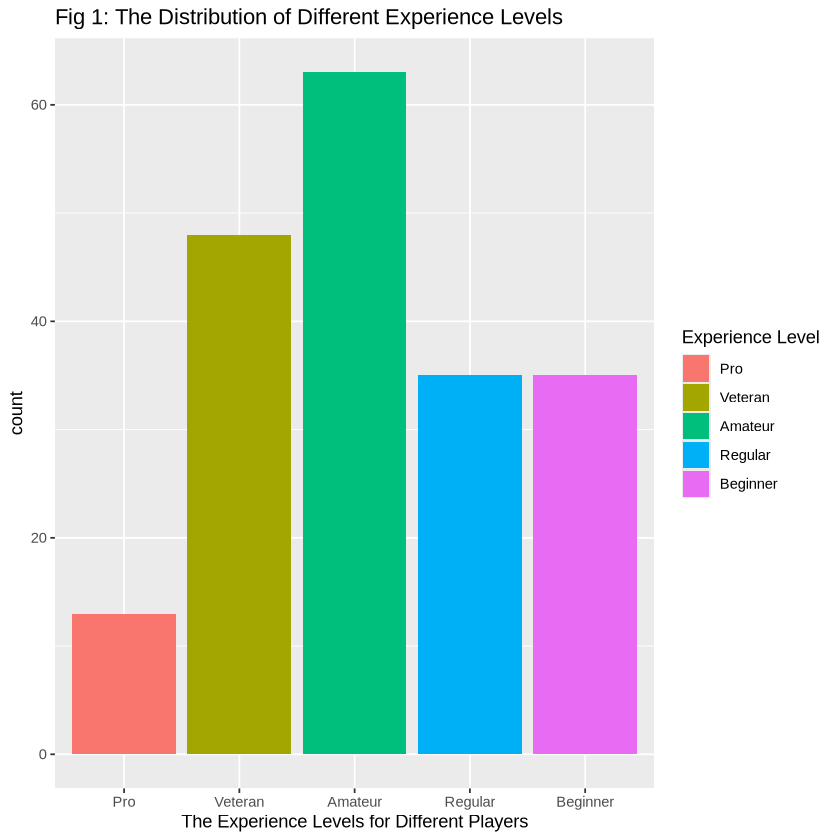

In [5]:
# Create bar graph with player count of each experience level

select_player_data_bar <- select_player_data |>
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar(stat = "count") +
    labs(x = "The Experience Levels for Different Players", title = "Fig 1: The Distribution of Different Experience Levels", fill = "Experience Level")
select_player_data_bar

**Explanation of Visualization:** Figure 1 shows a bargraph of the amount of players per experience level.  We can see that there are more amateur players than any other players, followed by veterans. Regular and beginner players are more balanced and pro players make up the smallest group.

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”


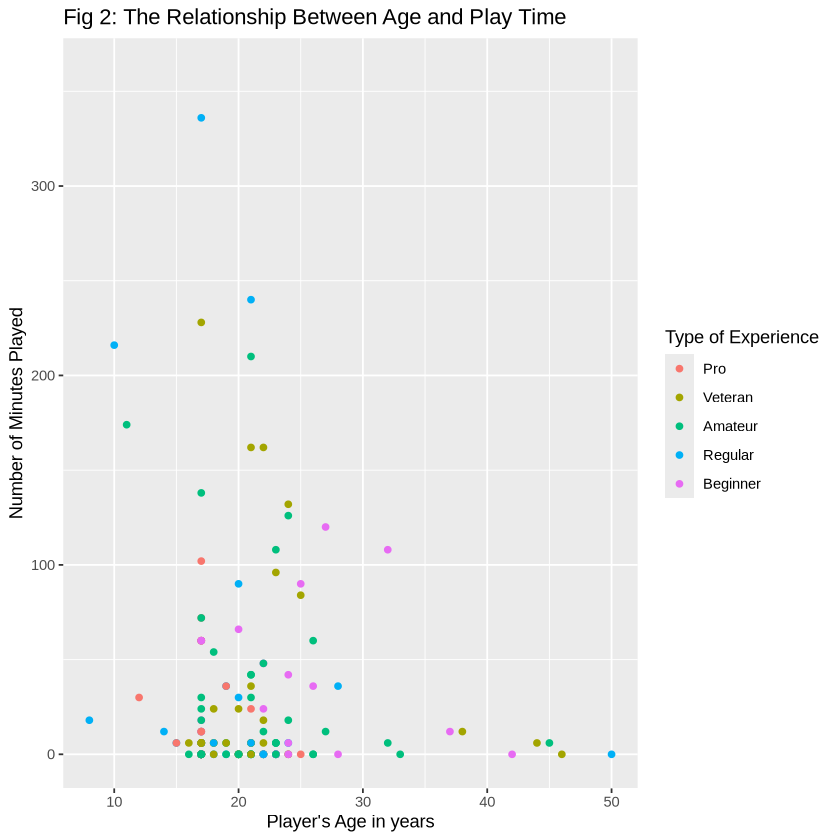

In [25]:
# Create scatterplot with Age vs. played_hours

select_player_data_plot <- select_player_data |>
    mutate(played_mins = (played_hours * 60)) |>
    ggplot(aes(x = Age, y = played_mins)) +
    ylim(0, 360) +
    geom_point(aes(color = experience)) +
    labs(x = "Player's Age in years", y = "Number of Minutes Played", color = "Type of Experience", title = "Fig 2: The Relationship Between Age and Play Time")
select_player_data_plot

**Explanation of Visualization:** Figure 2 shows a scatterplot of age and the different types of experience levels relative to the playing time in minutes. To make the graph visually pleasing, we had to limit the amount of play time to 6 hours (360 minutes).  From the graph, we are not able to pick up a pattern on age and playing time

## Training and Modeling the Data

To ensure that our data analysis is reproducible, we will set the seed to 123. In this portion, we will start to train and model the players data so that we can predict which experience levels fits with a new data point given. First, we will split the data into 75% training data and 25% testing data. We are using the training data to determine the performance of my classifier. We will create a knn specification model and recipe, making sure to scale and center the data in the recipe. Next, we will create a workflow and perform a 5 fold cross validation on the training data. Then, we will create a new workflow to determine the best K value for the model. 

In [7]:
# Create the 25/75 split of the training data into training and validation

set.seed(123)

player_split <- select_player_data |>
    drop_na()|>
    initial_split(prop = 0.75, strata = experience)
player_training <- training(player_split)
player_testing <- testing(player_split)

head(player_training)
head(player_testing)

experience Age played_hours
1 Amateur    21   0.7        
2 Amateur    17   0.0        
3 Amateur    22   0.2        
4 Amateur    22   0.0        
5 Amateur    17  48.4        
6 Amateur    17   0.5

experience Age played_hours
1 Pro         9  30.3        
2 Veteran    17   0.0        
3 Regular    21   0.1        
4 Amateur    21   0.0        
5 Amateur    17   0.1        
6 Pro        17   0.0

In [8]:
# Create the standardization recipe (scaling all predictors of Age and played_hours)

players_recipe <- recipe(experience ~ Age + played_hours, data = player_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [9]:
# Creating the specification with tune() as neighbors to find the best k value.

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
players_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
# Set up a grid for the tuning process, use k values from (1, 3, 5, ... 20)

k_vals <- tibble(neighbors = seq(1, 20, by = 2)) 

# Perform 5 cross-validations, and create a workflow

players_vfold <- vfold_cv(player_training, v = 5, strata = experience)

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

→ A | warning: ✖ No observations were detected in `truth` for level: Pro.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





In [11]:
# Filter the results metrics by accuracy

accuracies <- knn_results |>
  filter(.metric == "accuracy")
head(accuracies)

neighbors .metric  .estimator mean      n std_err    .config              
1  1        accuracy multiclass 0.2768582 5 0.02875289 Preprocessor1_Model01
2  3        accuracy multiclass 0.2978289 5 0.02037187 Preprocessor1_Model02
3  5        accuracy multiclass 0.2492209 5 0.01800312 Preprocessor1_Model03
4  7        accuracy multiclass 0.2770370 5 0.03512264 Preprocessor1_Model04
5  9        accuracy multiclass 0.2432950 5 0.02179198 Preprocessor1_Model05
6 11        accuracy multiclass 0.2427842 5 0.02816403 Preprocessor1_Model06

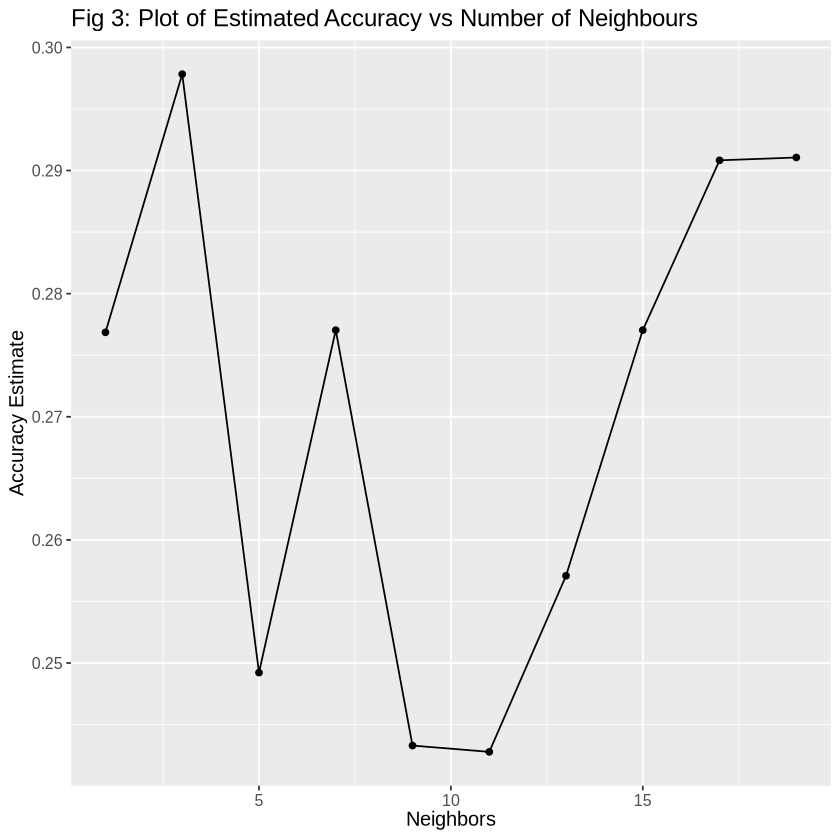

In [12]:
# Plotting KNN with accuracy

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate", title = "Fig 3: Plot of Estimated Accuracy vs Number of Neighbours") +
  theme(text = element_text(size = 12))
accuracy_vs_k

**Explanation of Visualization:** Figure 3 shows the number of neighbours with the highest accuracy estimate. Setting the number to K = 3 gives us the highest cross-validation accuracy estimate.

In [13]:
# Returning the best k as a numerical answer

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 3

## Performing the Data Analysis 

We will create a new knn specification model using the K value I found and create a workflow with the testing set to evaluate the accuracy of the classifier on unseen data. 


In [14]:
# Specifying model with the best_k (3)

players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")
players_tune

# Fitting the model

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_tune) |>
  fit(data = player_training)

players_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = best_k
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6666667
Best kernel: rectangular
Best k: 3

In [15]:
# Use fitted model to predict testing set

player_test_predictions <- predict(players_fit, player_testing) |>
  bind_cols(player_testing)

player_test_predictions <- predict(players_fit, player_testing) |>
  bind_cols(player_testing)

player_test_predictions |>
  metrics(truth = experience, estimate = .pred_class) |>
  filter(.metric == "accuracy")

player_test_predictions |>
    precision(truth = experience, estimate = .pred_class, event_level="first")

player_test_predictions |>
    recall(truth = experience, estimate = .pred_class, event_level="first")

.metric  .estimator .estimate
1 accuracy multiclass 0.3

.metric   .estimator .estimate
1 precision macro      0.2142857

.metric .estimator .estimate
1 recall  macro      0.2259005

In [16]:
# Creating confusion matrix

confusion <- player_test_predictions |>
             conf_mat(truth = experience, estimate = .pred_class)
confusion

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       2       0       1        1
  Veteran    0       1       2       1        0
  Amateur    3       7      11       3        4
  Regular    1       1       2       1        2
  Beginner   1       2       1       1        2

## Visualization of the Analysis

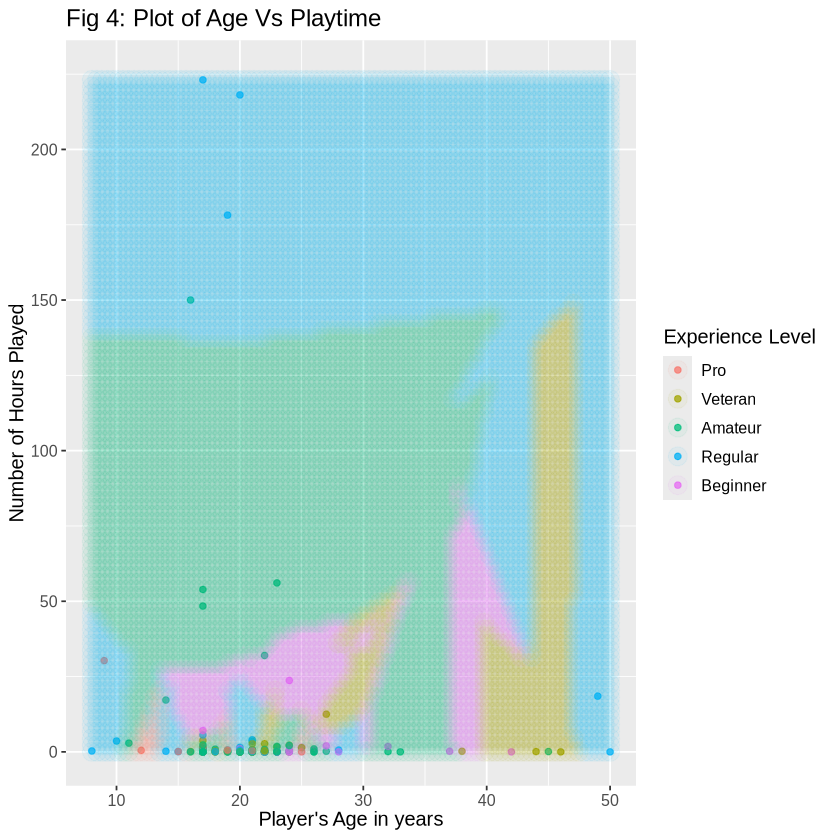

In [29]:
# Create the grid of age/played_hours vals, and arrange in a data frame

are_grid <- seq(min(select_player_data_mins$Age),
                max(select_player_data_mins$Age),
                length.out = 100)

smo_grid <- seq(min(select_player_data_mins$played_hours),
                max(select_player_data_mins$played_hours),
                length.out = 100)

asgrid <- as_tibble(expand.grid(Age = are_grid,
                                played_hours = smo_grid))

# Use the players_fit workflow to make predictions at the grid points

knnPredGrid <- predict(players_fit, asgrid)

# Bind the predictions as a new column with the grid points

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(experience = .pred_class)

# Create a plot of the final data analysis 

final_plot <- select_player_data |>
    ggplot() +
    geom_point(mapping = aes(x = Age,
                           y = played_hours,
                           color = experience), alpha = 0.75) +
    geom_point(data = prediction_table,
             mapping = aes(x = Age,
                           y = played_hours,
                           color = experience), alpha = 0.05, size = 5) +
    labs(color = "Experience Level",
            x = "Player's Age in years",
            y = "Number of Hours Played",
            title = "Fig 4: Plot of Age Vs Playtime") +
            ylim(0, 225) +
    theme(text = element_text(size = 12))
final_plot

**Explanation of Visualization:** Figure 4 shows a scatterplot of age and the different types of experience levels relative to the playing time in hours. The colour of the background is the classifier's prediction for each experience level. 

# Discussion



In this project, we tried to predict a player's experience level in the virtual world PLAlcraft using their age and hours played. Our analysis involved data wrangling, exploratory visualizations, and K-nearest neighbors (KNN) classification. Find details below for more insight:

#### What we found:
The dataset consisted of 196 players categorized into five experience levels: Amateur, Veteran, Regular, Beginner, and Pro. Most of the players are amateurs, and the pro players are the rarest.
The KNN model achieved the highest cross-validation accuracy (approximately 29.8%) with K = 3.
K=3. However, the testing accuracy was only 30%, indicating lower prediction reliability.
The confusion matrix revealed that the model struggled to distinguish between experience levels, often misclassifying players, especially amateurs.
#### Expectations:
The low accuracy suggests that the data with age and hours played can not only predict experience levels with reliability. This aligns with the lack of clear patterns in the scatter plot (Figure 2), where no strong relationship between age, playtime, and experience was seen.
We expected some correlation between them, but the results show that other factors might help more with prediction or can help increase prediction reliability.
#### Impact:
These findings show the need to collect additional variables to improve predictions.
The low accuracy results suggest that targeting players based only on age and playtime may not effectively provide the answer/results we are looking for. Instead, a more refined approach might be needed.
#### Possible future questions:
Will using a different classification style give better results?
How do player behaviors (other than the data we have about their behavior) impact experience levels?
Could including other variables improve the model/result?

# References

Timbers, Tiffany, et al. Data science: A First Introduction. CRC Press, 2022.

PLAICraft. plaicraft.ai.